In [39]:
import pandas as pd
from evaluate_time_series import evaluate

In [40]:
df = pd.read_csv("CocoaPrice.csv")

In [41]:
df

,Date,Price
0,1994-10-01,1447.95
1,1994-11-01,1437.05
2,1994-12-01,1399.43
3,1995-01-01,1468.86
4,1995-02-01,1510.55
...,...,...
349,2023-11-01,3799.15
350,2023-12-01,3897.04
351,2024-01-01,4087.54
352,2024-02-01,5226.12


In [42]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

Converting to Time Series

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df

,Date,Price
Date,,
1994-10-01,1994-10-01,1447.95
1994-11-01,1994-11-01,1437.05
1994-12-01,1994-12-01,1399.43
1995-01-01,1995-01-01,1468.86
1995-02-01,1995-02-01,1510.55
...,...,...
2023-11-01,2023-11-01,3799.15
2023-12-01,2023-12-01,3897.04
2024-01-01,2024-01-01,4087.54


Splitting Data Into Training Testing

In [44]:
training_data = df[df['Date'] < '2023-10-01']
testing_data = df[df['Date'] >= '2023-10-01']

print(training_data.tail())
print(testing_data)

                 Date    Price
Date                          
2023-05-01 2023-05-01  2673.46
2023-06-01 2023-06-01  2880.87
2023-07-01 2023-07-01  3028.41
2023-08-01 2023-08-01  3157.00
2023-09-01 2023-09-01  3395.58
                 Date    Price
Date                          
2023-10-01 2023-10-01  3495.03
2023-11-01 2023-11-01  3799.15
2023-12-01 2023-12-01  3897.04
2024-01-01 2024-01-01  4087.54
2024-02-01 2024-02-01  5226.12
2024-03-01 2024-03-01  6510.16


Visuaizing Time Series 

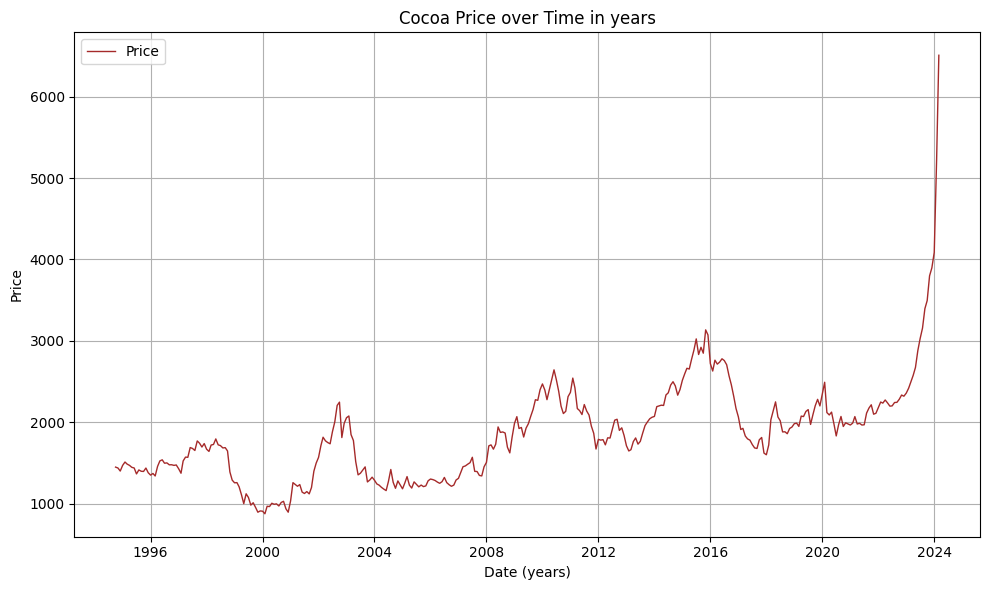

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], linestyle='-', color='brown', linewidth=1, label='Price')

plt.title('Cocoa Price over Time in years')
plt.xlabel('Date (years)')
plt.ylabel('Price')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Simple Time Series

Mean Method

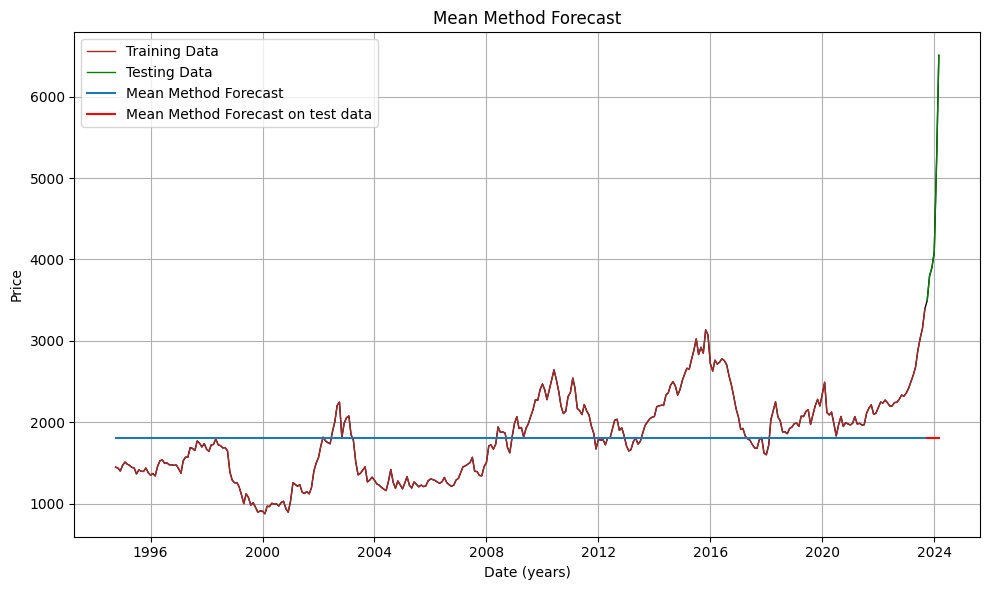

MSE: 8364501.529545136
RMSE: 2892.144797472135
MAE: 2695.1874999999995
MPE: -57.9635368216521
MAPE: 57.9635368216521
MASE: 36.473311905821376
ACF1: 0.3844148054816915


In [46]:
mean_price_with_time= np.array(training_data['Price'])

# Calculate mean for Price with time
mean_price_with_time = np.full(len(training_data['Price']), training_data['Price'].mean())
mean_price_with_time_test = np.full(len(testing_data['Price']), training_data['Price'].mean())

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], linestyle='-', color='black', linewidth=1)
plt.plot(training_data['Date'], training_data['Price'], label='Training Data', linestyle='-', color='brown', linewidth=1)
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data', linestyle='-', color='green', linewidth=1)
plt.plot(training_data["Date"], mean_price_with_time, label='Mean Method Forecast', linestyle='-')
plt.plot(testing_data["Date"], mean_price_with_time_test, label='Mean Method Forecast on test data', linestyle='-', color='red')
plt.title('Mean Method Forecast')
plt.xlabel('Date (years)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

evaluate(training_data['Price'], testing_data['Price'], mean_price_with_time_test)


Simple Naive Method

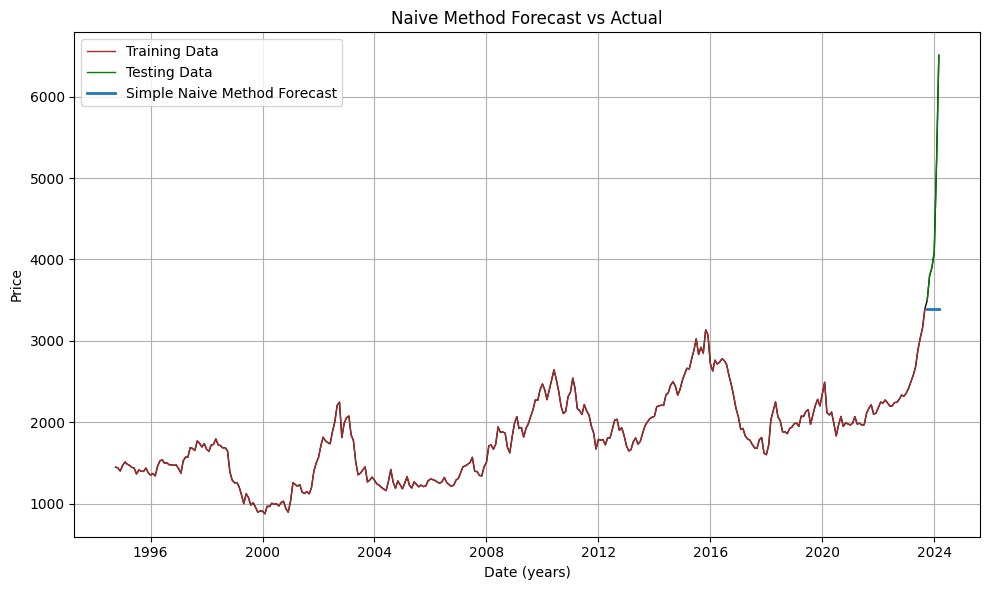

MSE: 2325752.5147666666
RMSE: 1525.0418075471462
MAE: 1106.9266666666667
MPE: -21.02215465218905
MAPE: 21.02215465218905
MASE: inf
ACF1: 0.38441480548169166


/Users/sammamsohail/Desktop/Stats TABA/Statistics-Taba/TimeSeries/evaluate_time_series.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  mase = mean_absolute_error / denom


In [47]:
# Extract the last observed price
last_observation = training_data['Price'].iloc[-1]

last_observation_train = np.full(len(training_data['Price']), last_observation)
price_with_time_test = np.full(len(testing_data['Price']), last_observation)

# Plot the naive forecast values
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], linestyle='-', color='black', linewidth=1)
plt.plot(training_data['Date'], training_data['Price'], label='Training Data', linestyle='-', color='brown', linewidth=1)
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data', linestyle='-',color='green', linewidth=1)
plt.plot(testing_data['Date'], price_with_time_test, label='Simple Naive Method Forecast', linestyle='-', linewidth=2)
plt.title('Naive Method Forecast vs Actual')
plt.xlabel('Date (years)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

evaluate(pd.Series(last_observation_train), testing_data['Price'], price_with_time_test)

Seasonal Naive Method

/var/folders/6g/4zq1d985075_7_l6gxj2n81m0000gn/T/ipykernel_69456/2936416304.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_12_months = training_data.last('12M')
/var/folders/6g/4zq1d985075_7_l6gxj2n81m0000gn/T/ipykernel_69456/2936416304.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_12_months = training_data.last('12M')
/var/folders/6g/4zq1d985075_7_l6gxj2n81m0000gn/T/ipykernel_69456/2936416304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_12_months['Date'] = last_12_months['Date'] + pd.DateOffset(years=1)


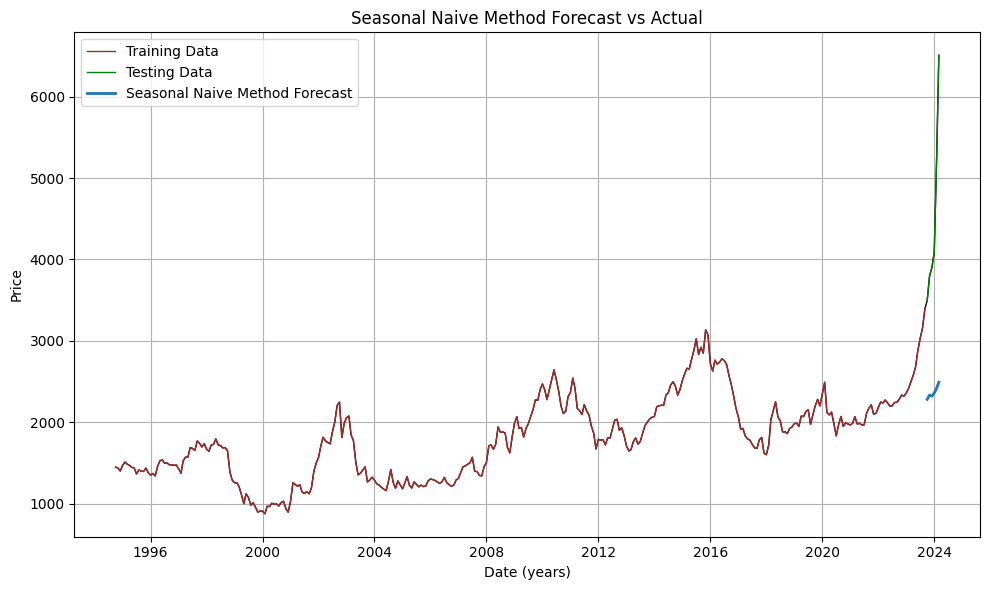

In [86]:
last_12_months = training_data.last('12M')

last_12_months['Date'] = last_12_months['Date'] + pd.DateOffset(years=1)
last_12_months.index = last_12_months['Date']

predicted = last_12_months[last_12_months.index.isin(testing_data.index)]

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], linestyle='-', color='black', linewidth=1)
plt.plot(training_data['Date'], training_data['Price'], label='Training Data', linestyle='-', color='brown', linewidth=1)
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data', linestyle='-',color='green', linewidth=1)
plt.plot(predicted.index, predicted['Price'], label='Seasonal Naive Method Forecast', linestyle='-', linewidth=2)
plt.title('Seasonal Naive Method Forecast vs Actual')
plt.xlabel('Date (years)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
import matplotlib.pyplot as plt

window_size = 30

rolling_mean = df.rolling(window=window_size).mean()
rolling_std = df.rolling(window=window_size).std()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label='Original Data', color='red')

plt.plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean', color='purple')

plt.plot(rolling_std.index, rolling_std.values, label='Rolling Std', color='blue')

plt.title('Rolling Mean and Standard Deviation Cocoa Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


DataError: Cannot aggregate non-numeric type: datetime64[ns]

Additive STL Decompostion

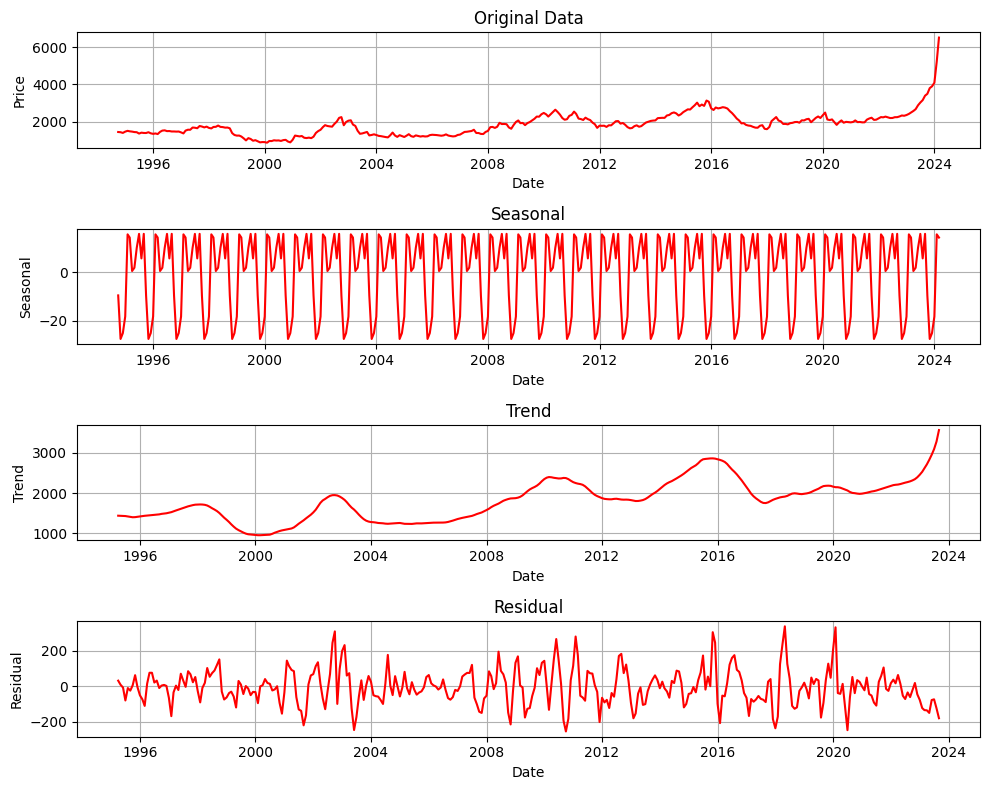

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive', period=12)

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df.values, label='Original Data', color='red')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(df.index, decomposition.seasonal, label='Seasonal', color='red')
plt.title('Seasonal')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(df.index, decomposition.trend, label='Trend', color='red')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(df.index, decomposition.resid, label='Residual', color='red')
plt.title('Residual')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()


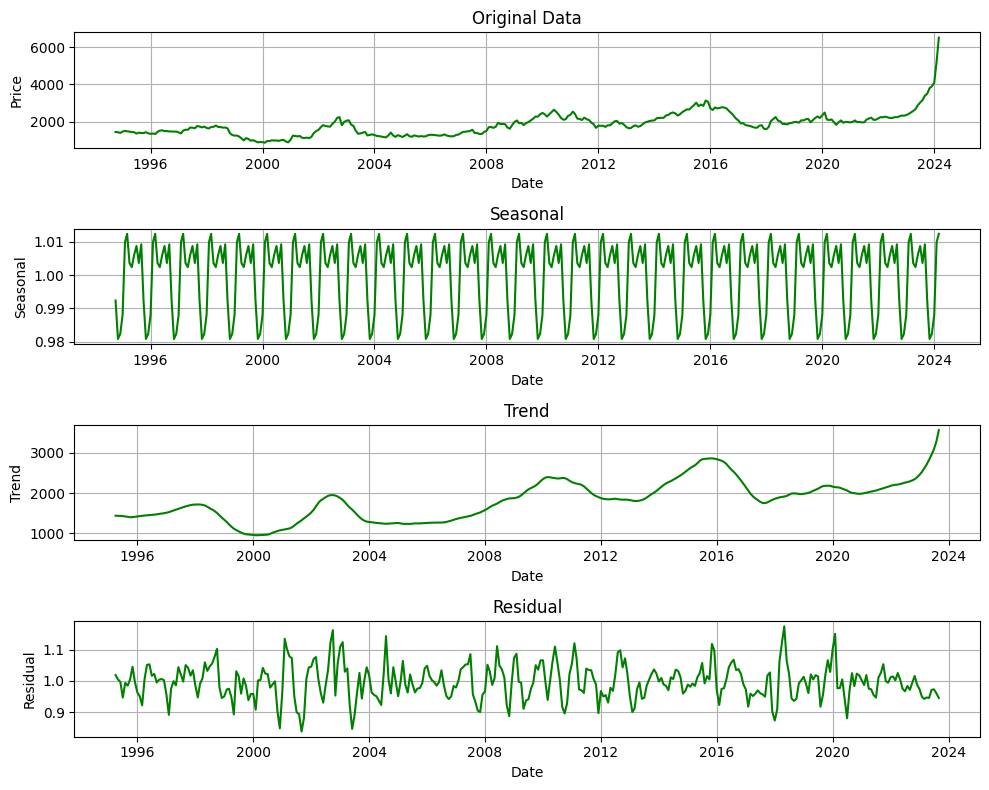

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='multiplicative', period=12)

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df.values, label='Original Data', color='green')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(df.index, decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(df.index, decomposition.trend, label='Trend', color='green')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(df.index, decomposition.resid, label='Residual', color='green')
plt.title('Residual')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)

print('ADF Statistic : ', result[0], 'p-value : ', result[1], 'p-value : ', result[1], '\n')

print('Critical Values : ')
for key, value in result[4].items():
    print(f'{key}: {value}')

if result[1] < 0.05:
    print('\nNull hypothesis H0 rejected: Time series is stationary')
else:
    print('\nNull hypothesis H0 rejection Failed: Time series is non-stationary')

ADF Statistic :  1.5287178514947268 p-value :  0.9976271539962083 p-value :  0.9976271539962083 

Critical Values : 
1%: -3.4493918438232525
5%: -2.8699298018856574
10%: -2.5712397066390458

Null hypothesis H0 rejection Failed: Time series is non-stationary


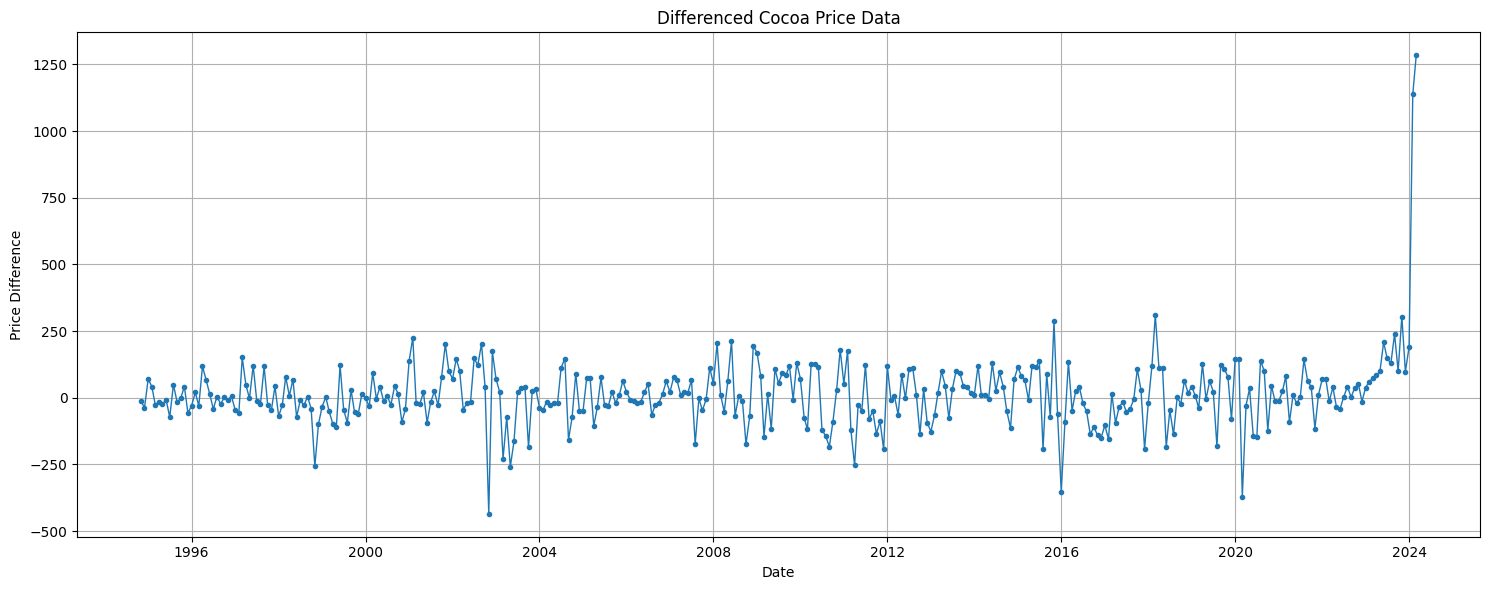

In [ ]:
differenced_data = df.diff().dropna()

plt.figure(figsize=(15, 6))
plt.plot(differenced_data.index, differenced_data.values, marker='.', linestyle='-', linewidth=1)
plt.title('Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Now checking for ADF test again to the differenced data to check whether the data is stationary
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on differenced data
result_diff = adfuller(differenced_data)

# Extract and print the test statistics
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

# Interpret the results
if result_diff[1] < 0.05:
    print('\nNull hypothesis H0 rejected: Time series is stationary')
else:
    print('\nNull hypothesis H0 rejection Failed: Time series is non-stationary')


ADF Statistic: 0.0744814583455678
p-value: 0.9642750135031481
Critical Values:
	1%: -3.4493918438232525
	5%: -2.8699298018856574
	10%: -2.5712397066390458

Null hypothesis H0 rejection Failed: Time series is non-stationary


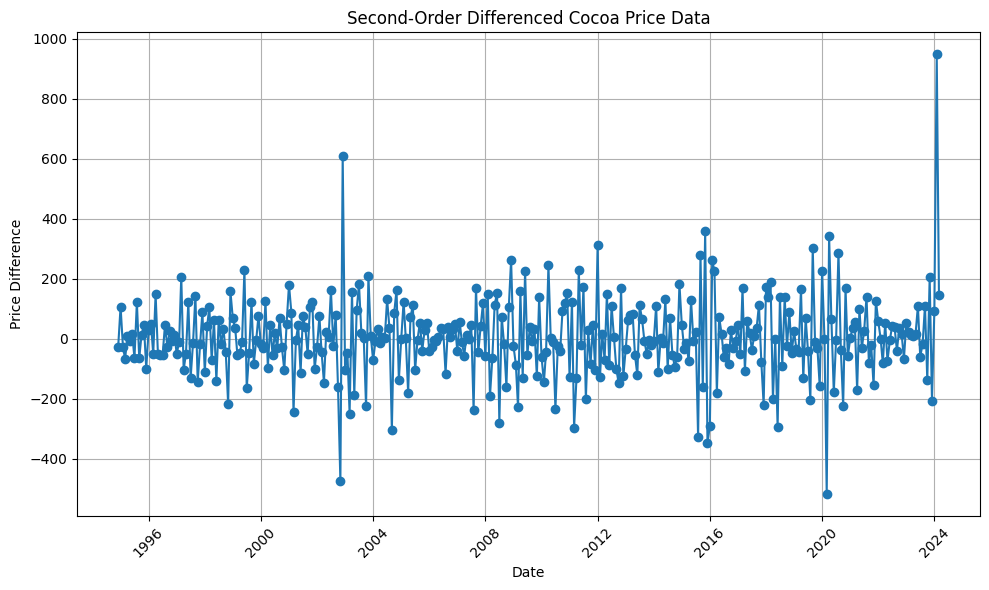

In [ ]:
# Performing higher order referencing as the data is still non stationary

# Perform higher-order differencing on the time series data
second_order_diff = df.diff().diff().dropna()

# Plot the second-order differenced data
plt.figure(figsize=(10, 6))
plt.plot(second_order_diff.index, second_order_diff.values, marker='o', linestyle='-')
plt.title('Second-Order Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Perform Augmented Dickey-Fuller test on second-order differenced data
result_second_order_diff = adfuller(second_order_diff)

# Extract and print the test statistics
print('ADF Statistic:', result_second_order_diff[0])
print('p-value:', result_second_order_diff[1])
print('Critical Values:')
for key, value in result_second_order_diff[4].items():
    print(f'\t{key}: {value}')

# Interpret the results
if result_second_order_diff[1] < 0.05:
    print('\nNull hypothesis H0 rejected: Time series is stationary')
else:
    print('\nNull hypothesis H0 rejection Failed: Time series is non-stationary')

ADF Statistic: -10.841824614684086
p-value: 1.6087080135309558e-19
Critical Values:
	1%: -3.4493918438232525
	5%: -2.8699298018856574
	10%: -2.5712397066390458

Null hypothesis H0 rejected: Time series is stationary


In [ ]:
# Hence now the data is stationary

In [ ]:
# ACF and PACF plots:

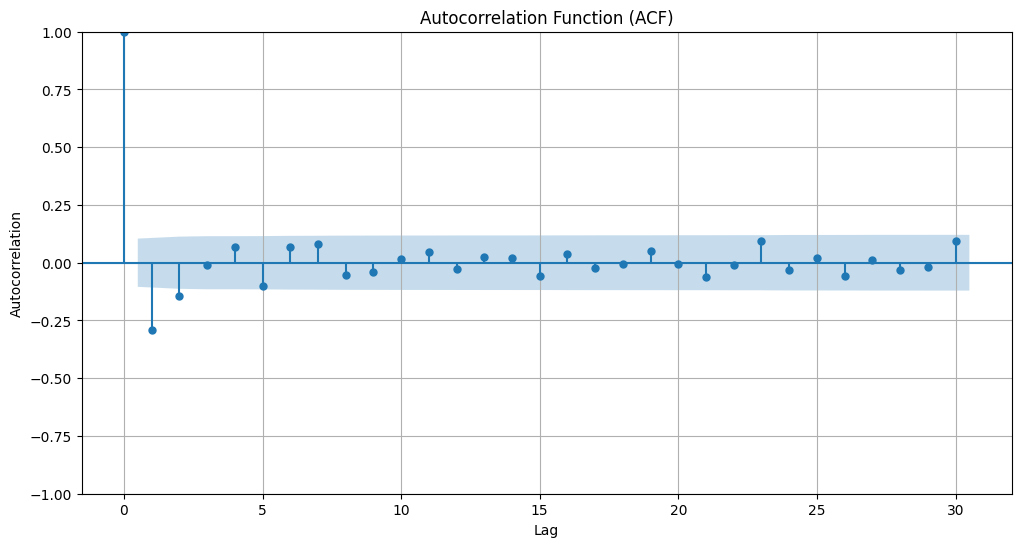

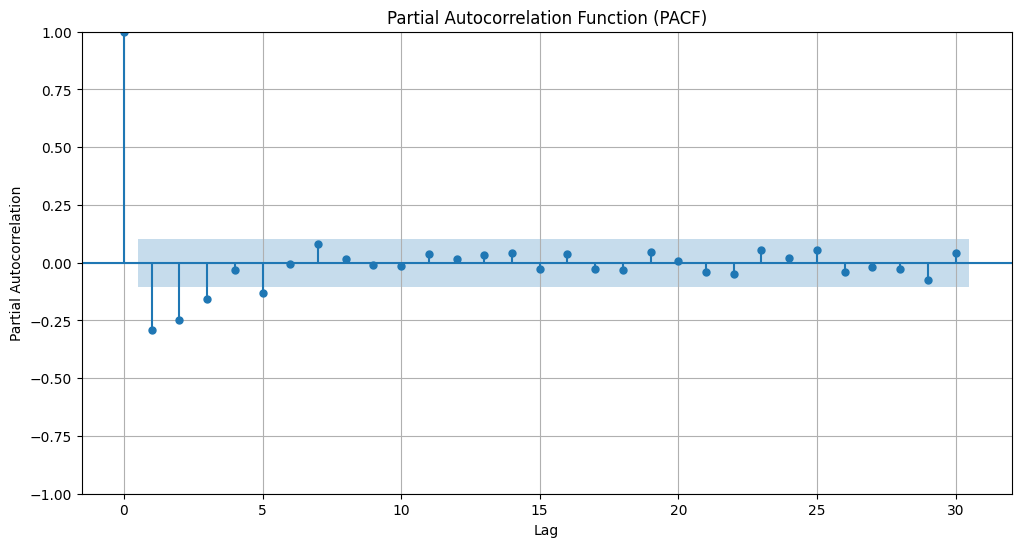

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(second_order_diff, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(second_order_diff, lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()


In [ ]:
# Timeplot of differenced data

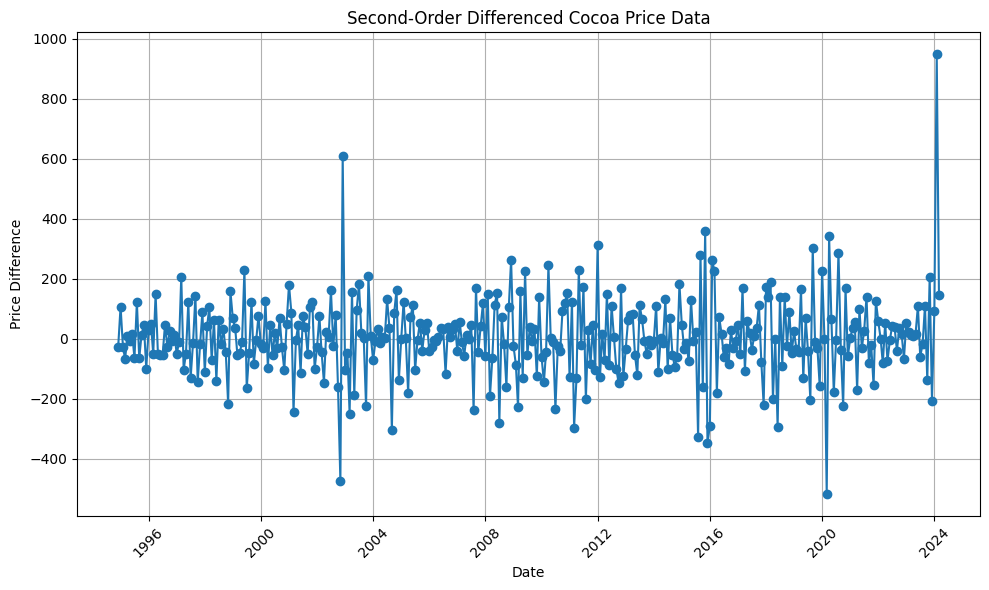

In [ ]:
# Plot the time series data after second-order differencing
plt.figure(figsize=(10, 6))
plt.plot(second_order_diff.index, second_order_diff.values, marker='o', linestyle='-')
plt.title('Second-Order Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


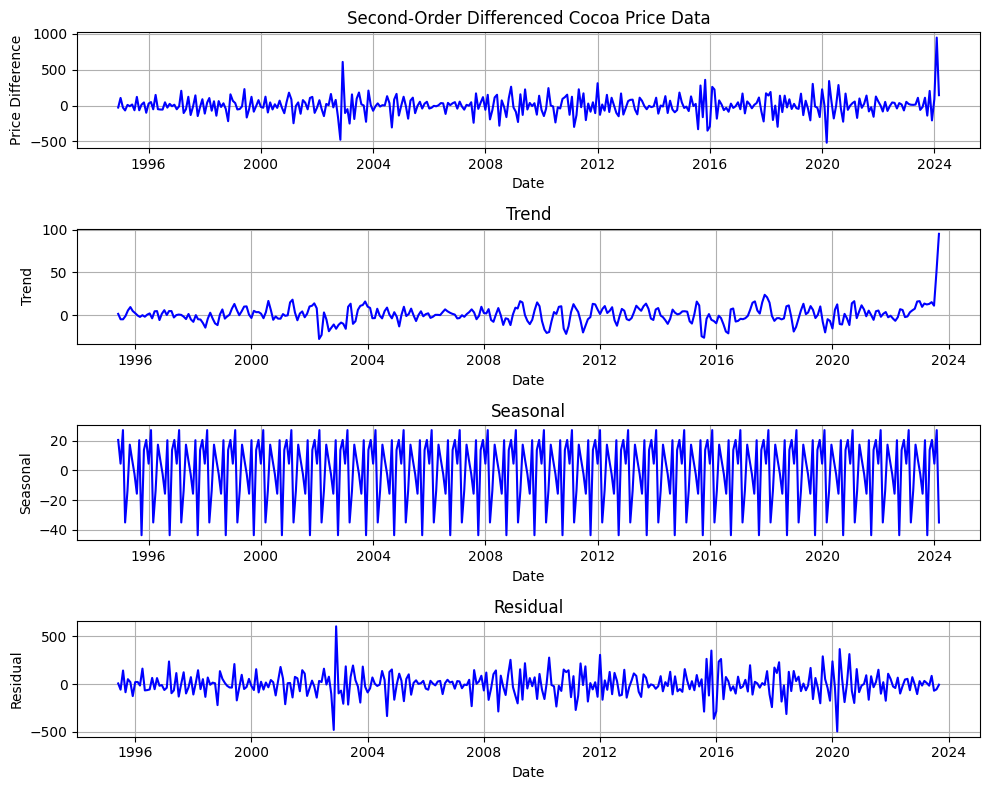

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using LOESS on the second-order differenced data
stl_decomposition = seasonal_decompose(second_order_diff, model='additive', period=12)  # Assuming seasonality period is 12 months

# Plot the STL decomposition
plt.figure(figsize=(10, 8))

# Original time series data
plt.subplot(4, 1, 1)
plt.plot(second_order_diff.index, second_order_diff.values, label='Second-Order Differenced Data', color='blue')
plt.title('Second-Order Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)

# Trend component
plt.subplot(4, 1, 2)
plt.plot(stl_decomposition.trend.index, stl_decomposition.trend.values, label='Trend', color='blue')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(stl_decomposition.seasonal.index, stl_decomposition.seasonal.values, label='Seasonal', color='blue')
plt.title('Seasonal')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.grid(True)

# Residual component
plt.subplot(4, 1, 4)
plt.plot(stl_decomposition.resid.index, stl_decomposition.resid.values, label='Residual', color='blue')
plt.title('Residual')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()


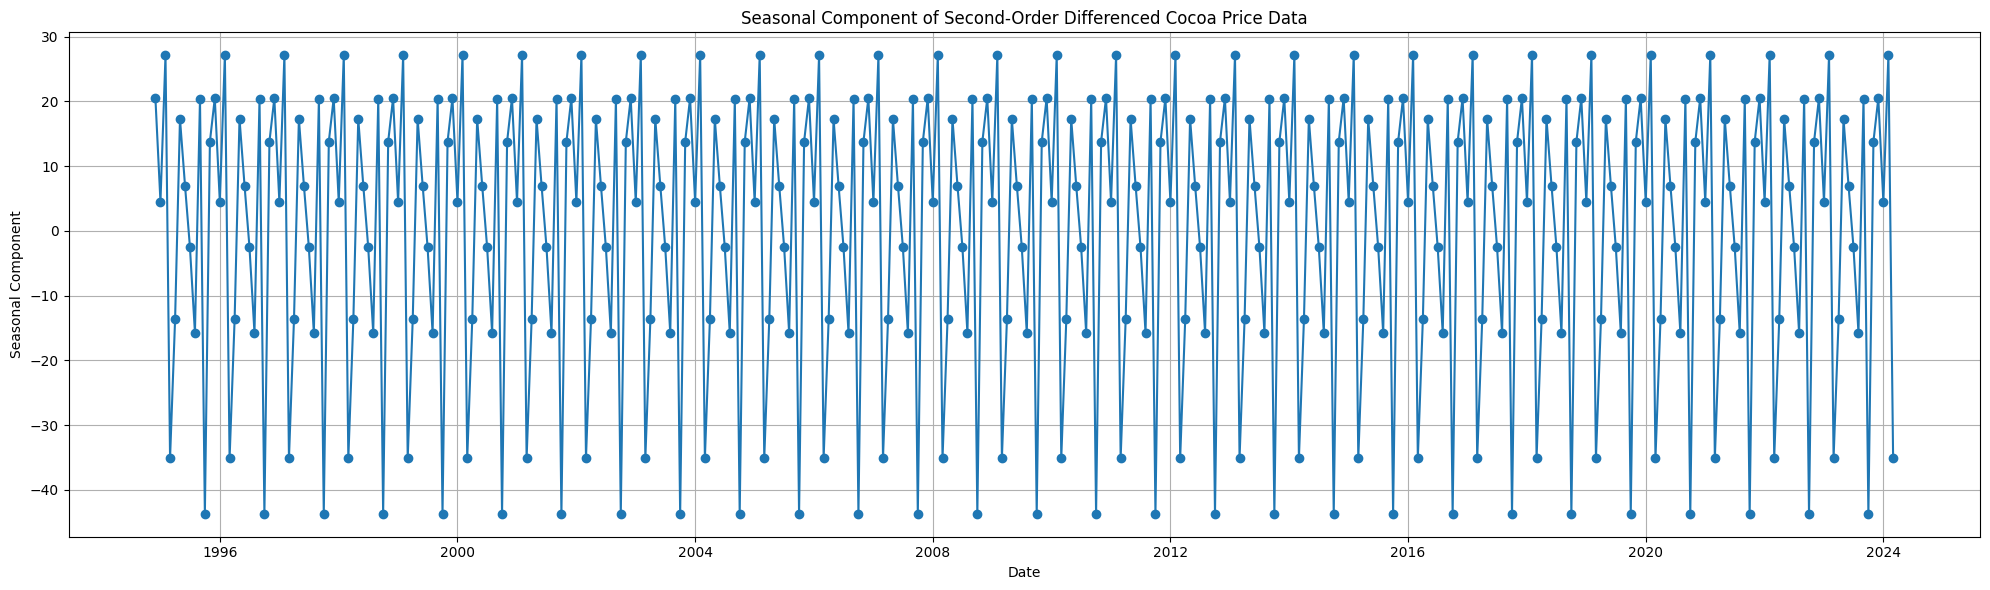

In [ ]:
# Plot the seasonal component of the second-order differenced data
plt.figure(figsize=(20, 6))
plt.plot(stl_decomposition.seasonal.index, stl_decomposition.seasonal.values, marker='o', linestyle='-')
plt.title('Seasonal Component of Second-Order Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from pmdarima.arima import auto_arima

# Fit auto ARIMA model
auto_model = auto_arima(second_order_diff, seasonal=True, m=12, trace=True, suppress_warnings=True)

# Print the summary of the auto ARIMA model
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4466.340, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4439.123, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4398.885, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4464.594, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4396.989, Time=0.04 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=4398.882, Time=0.12 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=4383.071, Time=0.06 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=4385.071, Time=0.17 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=4385.071, Time=0.19 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4437.152, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=4377.315, Time=0.10 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order (p, d, q) for the ARIMA model
p, d, q = 2, 0, 2

# Fit the ARIMA model
arima_model = ARIMA(second_order_diff, order=(p, d, q)).fit()

# Print the summary of the ARIMA model
print(arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  352
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2182.149
Date:                Mon, 29 Apr 2024   AIC                           4376.298
Time:                        03:07:50   BIC                           4399.480
Sample:                    12-01-1994   HQIC                          4385.523
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8675      1.976      0.945      0.345      -2.005       5.740
ar.L1          0.9453      0.202      4.691      0.000       0.550       1.340
ar.L2         -0.3908      0.071     -5.527      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Split the data into training and test sets
train_data = second_order_diff.loc[:'2023-09-30']
test_data = second_order_diff.loc['2023-10-01':'2024-03-31']

# Fit an ARIMA model to the training set
p, d, q = 2, 0, 2
arima_model = ARIMA(train_data, order=(p, d, q)).fit()

# Forecast the average prices for the test set
forecast_values = arima_model.forecast(steps=len(test_data))[0]

# Evaluate the forecasts against the actual data for the test period
forecast_index = test_data.index
actual_values = test_data.values

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

Mean Absolute Percentage Error (MAPE): 144.77%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/6g/4zq1d985075_7_l6gxj2n81m0000gn/T/ipykernel_42530/2702298596.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_values = arima_model.forecast(steps=len(test_data))[0]
